In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Sequential

In [4]:
def load_data():
    X = np.load("/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/X.npy")
    y = np.load("/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [5]:
X, y = load_data()

In [6]:
print(X.shape, y.shape)

(1000, 400) (1000, 1)


In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

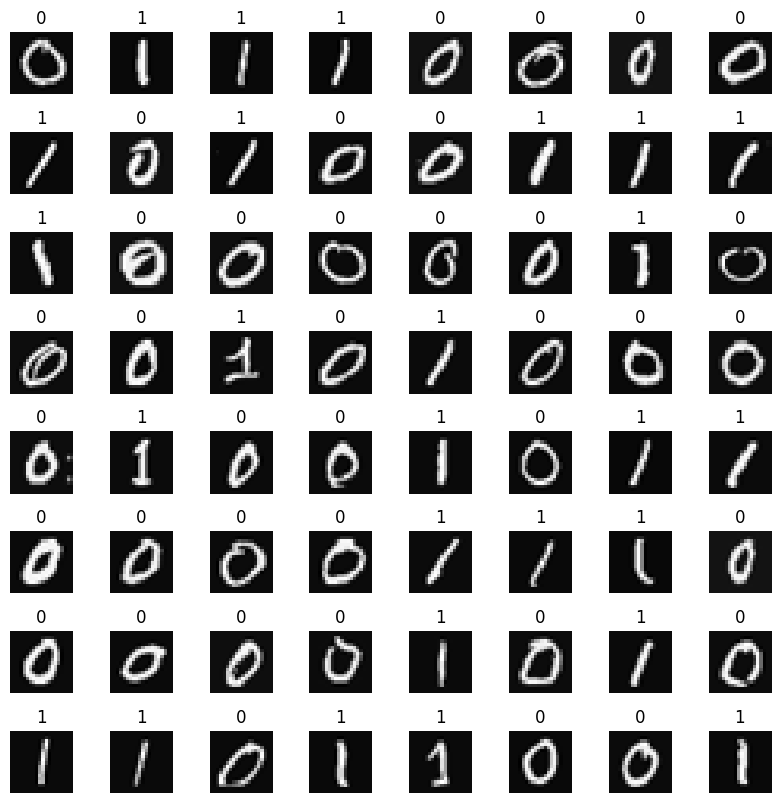

In [8]:
m, n = X.shape
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [9]:
axes.flat

In [10]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='sigmoid'),
        Dense(units=15, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model"
)

In [11]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [14]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs = 20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.6507
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.4950
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.3426
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.2254
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.1621
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.1207
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0954
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.0773
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.0636
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.0550
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.0483
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0402
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0358
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0321
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - lo

In [15]:
prediction = model.predict(X[0].reshape(1,400))
print(f"predicting a zero : {prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f"predicting a one : {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicting a zero : [[0.01410852]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
predicting a one : [[0.98211384]]


In [16]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold = {yhat}")

prediction after threshold = 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

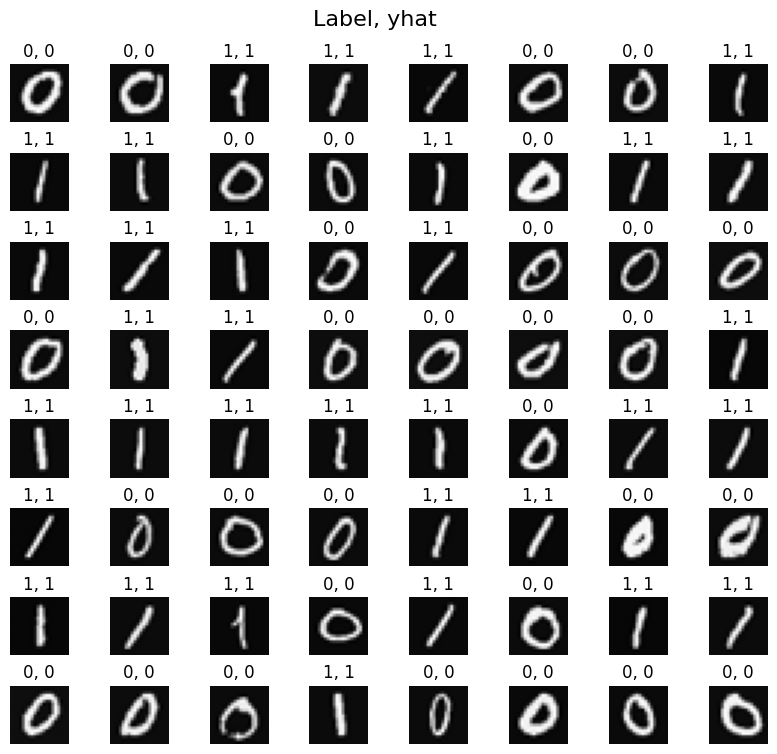

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92])

for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape(20,20).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [18]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

def my_dense(a_in, W, b):
    """Computes dense layer

    Args:
        a_in (ndarray (n,)): Data, 1 example
        W (ndarray (n,j)): Weight matrix, n features per unit, j, units
        b (ndarray (j,)): j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for i in range(units):
        z = np.dot(a_in, W[:,i]) + b[i]
        a_out[i] = sigmoid(z)
        
    return a_out
    

In [19]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense(x_tst, W_tst, b_tst)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [20]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    a3 = my_dense(a2, W3, b3)
    return a3

In [21]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [22]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp ,b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print("yhat = ", yhat, " label = ", y[0,0])

prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp ,b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
    
print("yhat = ", yhat, " label = ", y[500,0])

yhat =  0  label =  0
yhat =  1  label =  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

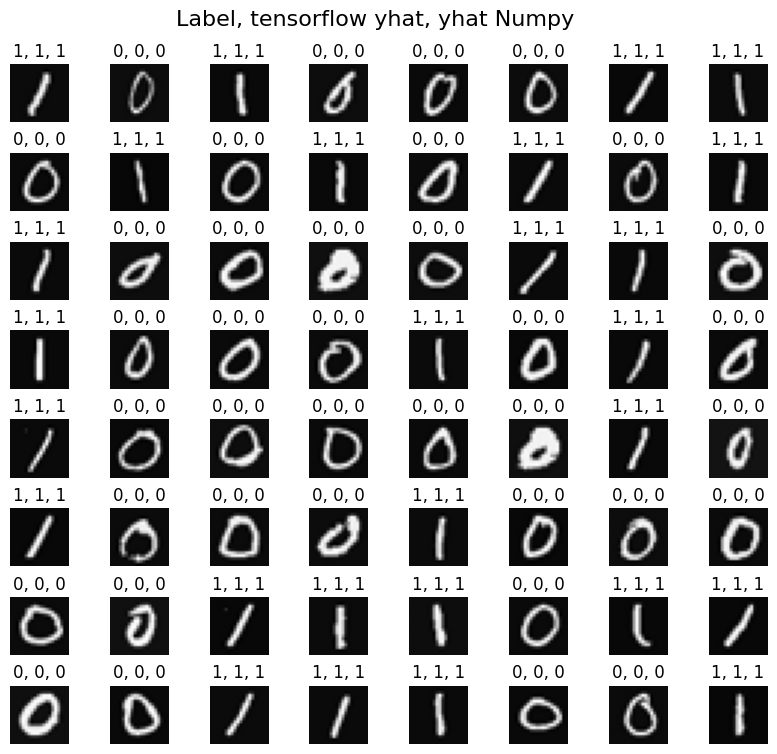

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92])

for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape(20,20).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        tf_yhat = 1
    else:
        tf_yhat = 0
    
    prediction =my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    if prediction >= 0.5:
        my_yhat = 1
    else:
        my_yhat = 0
    
    ax.set_title(f"{y[random_index,0]}, {tf_yhat}, {my_yhat}")
    ax.set_axis_off()

fig.suptitle("Label, tensorflow yhat, yhat Numpy", fontsize=16)
plt.show()

In [26]:
def my_dense_vec(a_in, W, b):
    """Compute dense (vectorised implementation)

    Args:
        a_in (ndarray (n,)): Data, 1 example
        W (ndarray (n,j)): Weights, n features, j units
        b (ndarray (j,)): Bias, j units
    """
    
    a_out = np.matmul(a_in, W) + b
    a_out = sigmoid(a_out)
    return a_out

In [27]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense_vec(x_tst, W_tst, b_tst)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [28]:
def my_sequential_vec(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense_vec(x, W1, b1)
    a2 = my_dense_vec(a1, W2, b2)
    a3 = my_dense_vec(a2, W3, b3)
    
    return a3

In [29]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [31]:
Prediction = my_sequential_vec(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
Prediction.shape

(1000, 1)

In [32]:
Yhat = (Prediction>=0.5).astype(int)

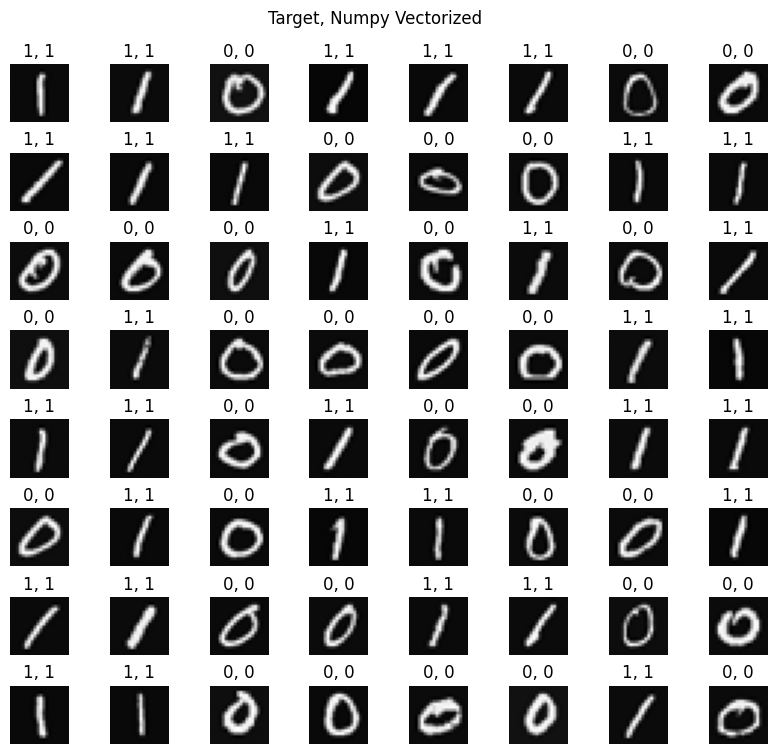

In [47]:
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92])

for i, ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    ax.imshow(X[random_index].reshape(20,20).T, cmap='gray')
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index,0]}")
    ax.set_axis_off()
    
fig.suptitle('Target, Numpy Vectorized')
plt.show()

## Completed exercise by coding each part